In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from cancer_games import CancerGame
from fears.utils import plotter

cc = plotter.gen_color_cycler(style='solid',n_colors=4,palette='colorblind')
cc_dict = cc.by_key()
c = cc_dict['color']

color_list = cc.by_key()['color']

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

/Users/eshanking/repos/msw_analysis/cancer_games.py:708: RuntimeWarning: invalid value encountered in scalar power
  y = gmax + ((gmin - gmax) * conc**hc) / (ic_50**hc + conc**hc)


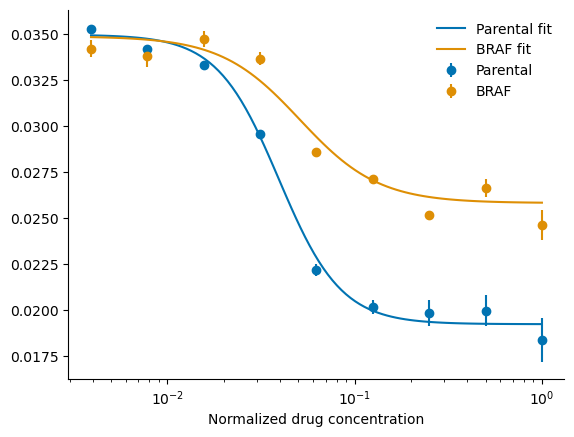

In [3]:
parental_dr_params = []

exp_folder = 'data/3_Game_parental_vs_braf_Osi_092322'

cg = CancerGame(exp_folder)
cg.execute()

fig,ax = plt.subplots()

data = cg.fitness_parental
dr_params = cg.parental_dr_params

parental_dr_params.append(dr_params)

ax.errorbar(cg.dc,data[0]['avg'],yerr=data[0]['err'],fmt='o',label='Parental',
            color=color_list[0])

xfit = np.logspace(np.min(np.log10(cg.dc)),
                    np.max(np.log10(cg.dc)),100)


yfit = cg.hill_fn(xfit,*dr_params[0])
ax.plot(xfit,yfit,color=color_list[0],label='Parental fit')

data = cg.fitness_resistant
dr_params = cg.mutant_dr_params

braf_dr_params = dr_params

ax.errorbar(cg.dc,data[1]['avg'],yerr=data[1]['err'],fmt='o',label='BRAF',
            color=color_list[1])

xfit = np.logspace(np.min(np.log10(cg.dc)),
                    np.max(np.log10(cg.dc)),100)
yfit = cg.hill_fn(xfit,*dr_params[1])
ax.plot(xfit,yfit,color=color_list[1],label='BRAF fit')

ax.set_xscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Normalized drug concentration')
ax.legend(frameon=False)


/Users/eshanking/repos/msw_analysis/cancer_games.py:232: RuntimeWarning: divide by zero encountered in log
  ax.plot(time,np.log(green_data),color='tab:cyan',linewidth=2.5)
/Users/eshanking/repos/msw_analysis/cancer_games.py:708: RuntimeWarning: invalid value encountered in scalar power
  y = gmax + ((gmin - gmax) * conc**hc) / (ic_50**hc + conc**hc)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

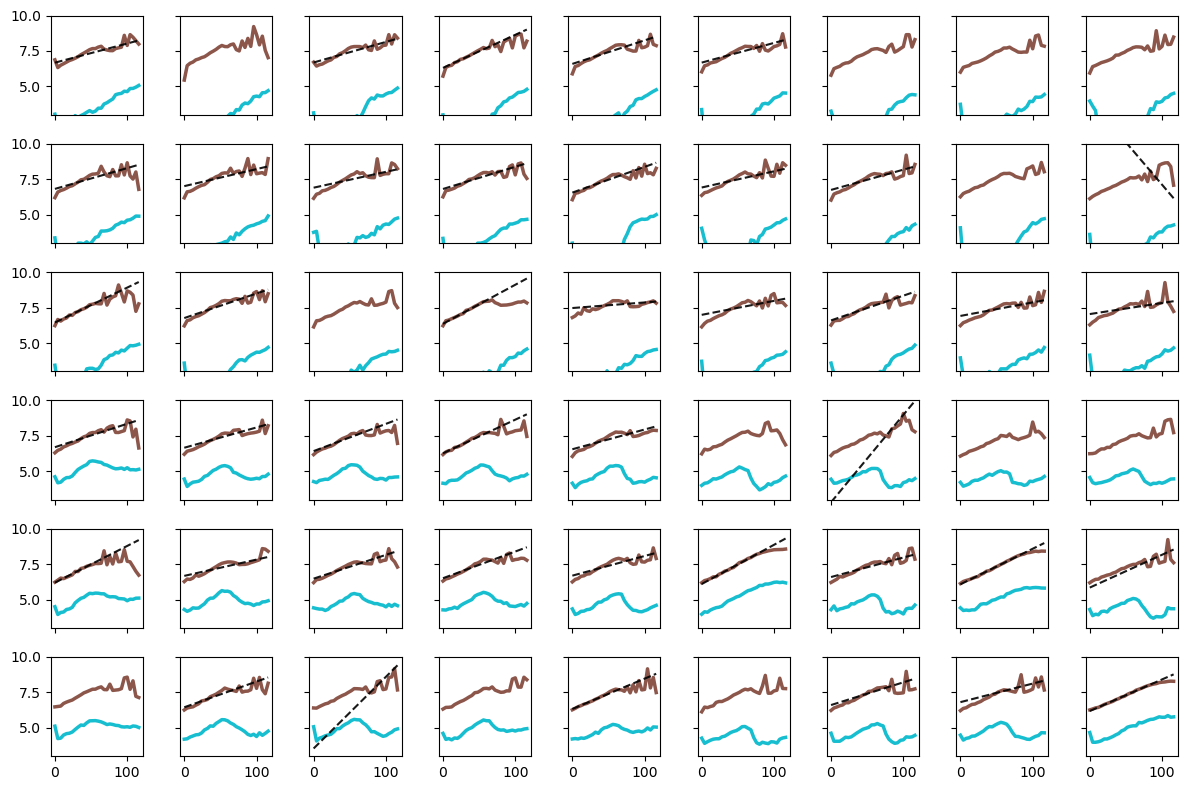

In [5]:
exp_folder = 'data/8_parental_vs_kras_braf_DM_Osi_120122'

# proportions = [1,0.9,1,0.9,0.7,0.5,0.3,0.1,0.05,0] # account for plate 1 and plate 1b

cg = CancerGame(exp_folder,red_key='Count_bfp_objects')

cg.plot_plate(plot_fit=True)

cg.execute()

fig,ax = plt.subplots()

data = cg.fitness_parental
dr_params = cg.parental_dr_params

parental_dr_params.append(dr_params)

ax.errorbar(cg.dc,data[0]['avg'],yerr=data[0]['err'],fmt='o',label='Parental',
            color=color_list[0])

xfit = np.logspace(np.min(np.log10(cg.dc)),
                    np.max(np.log10(cg.dc)),100)

yfit = cg.hill_fn(xfit,*dr_params[0])
ax.plot(xfit,yfit,color=color_list[0],label='Parental fit')

data = cg.fitness_resistant
dr_params = cg.mutant_dr_params

kras_braf_dr_params = dr_params

ax.errorbar(cg.dc,data[1]['avg'],yerr=data[1]['err'],fmt='o',label='KRAS-BRAF',
            color=color_list[1])

xfit = np.logspace(np.min(np.log10(cg.dc)),
                    np.max(np.log10(cg.dc)),100)
yfit = cg.hill_fn(xfit,*dr_params[1])
ax.plot(xfit,yfit,color=color_list[1],label='KRAS-BRAF fit')

ax.set_xscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Normalized drug concentration')
ax.legend(frameon=False)


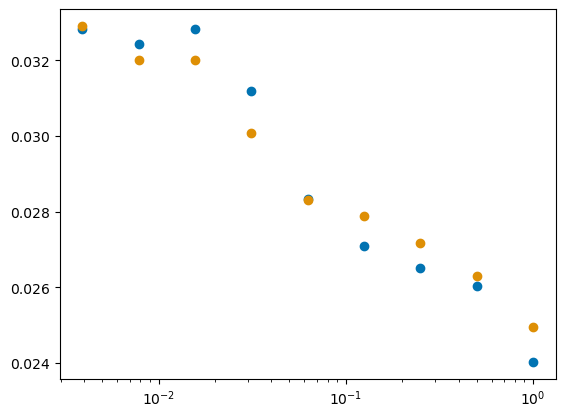

In [12]:
exp_folder = 'data/6_Game_braf_vs_kras_Osi_112322'

cg = CancerGame(exp_folder,use_sigma=False)

# cg.plot_plate(plot_fit=True,plate_num=3)

cg.set_fitness_params()

fig,ax = plt.subplots()

ax.plot(cg.dc,cg.fitness_parental[0]['avg'],'o',color=color_list[0],label='BRAF')
ax.plot(cg.dc,cg.fitness_resistant[1]['avg'],'o',color=color_list[1],label='KRAS')

ax.set_xscale('log')
# cg.execute()

# fig,ax = plt.subplots()

# data = cg.fitness_parental
# dr_params = cg.parental_dr_params

# ax.errorbar(cg.dc,data[0]['avg'],yerr=data[0]['err'],fmt='o',label='BRAF',
#             color=color_list[0])

# xfit = np.logspace(np.min(np.log10(cg.dc)),
#                     np.max(np.log10(cg.dc)),100)

# yfit = cg.hill_fn(xfit,*dr_params[0])
# ax.plot(xfit,yfit,color=color_list[0],label='BRAF fit')

# data = cg.fitness_resistant
# dr_params = cg.mutant_dr_params

# kras_dr_params = dr_params

# ax.errorbar(cg.dc,data[1]['avg'],yerr=data[1]['err'],fmt='o',label='KRAS',
#             color=color_list[1])

# xfit = np.logspace(np.min(np.log10(cg.dc)),
#                     np.max(np.log10(cg.dc)),100)
# yfit = cg.hill_fn(xfit,*dr_params[1])
# ax.plot(xfit,yfit,color=color_list[1],label='KRAS fit')

# ax.set_xscale('log')

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# ax.set_xlabel('Normalized drug concentration')
# ax.legend(frameon=False)


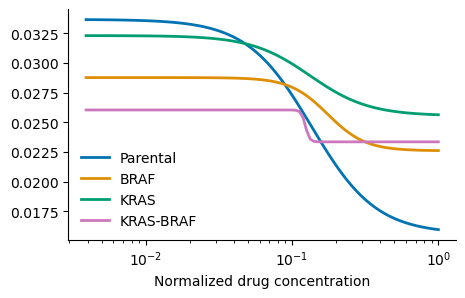

In [34]:
parental_dr_params_mean = (parental_dr_params[0][0] + parental_dr_params[1][0])/2

fig,ax = plt.subplots(figsize=(5,3))

yfit = cg.hill_fn(xfit,*parental_dr_params_mean)

ax.plot(xfit,yfit,color=color_list[0],label='Parental',linewidth=2)

yfit = cg.hill_fn(xfit,*braf_dr_params[1])

ax.plot(xfit,yfit,color=color_list[1],label='BRAF',linewidth=2)

yfit = cg.hill_fn(xfit,*kras_dr_params[1])

ax.plot(xfit,yfit,color=color_list[2],label='KRAS',linewidth=2)

yfit = cg.hill_fn(xfit,*kras_braf_dr_params[1])

ax.plot(xfit,yfit,color=color_list[3],label='KRAS-BRAF',linewidth=2)

ax.set_xscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Normalized drug concentration')
ax.legend(frameon=False)